In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import builtins

In [2]:
spark = SparkSession.builder.appName("Python Spark SQL basic example").config("spark.some.config.option", "some-value").getOrCreate()

#### 1. **Dataset Understanding & Schema Validation**

1.	What is the schema of the dataset?
2.	Are column data types correctly inferred (dates, numerics, strings)?
3.	How many rows and columns are present?
4.	Which columns are categorical, numerical, and date/time?
5.	Are there any columns that should be cast to different types (e.g., string → date, string → double)?
6.	Is the dataset wide or tall, and does that affect processing strategy?
7.	Are column names consistent (no spaces, special characters, casing issues)?

In [3]:
df = spark.read.csv("superstore.csv",header=True,inferSchema=True)
df.show(5)

+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|  Customer Name|  Segment|      Country|           City|     State|Postal Code|Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156| 11/8/2016|11/11/2016|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Somerset 

**1. What is the schema of the dataset?**

In [4]:
df.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Profit: double (nullable = true)



**2. Are column data types correctly inferred (dates, numerics, strings)?**

No, I am modifying the data types for columns for which data types are not correctly inferred.

In [5]:
df_1 = df.withColumn("Sales",col("Sales").astype("float"))
df_1 = df_1.withColumn("Quantity",col("Quantity").astype("float"))
df_1 = df_1.withColumn("Discount",col("Discount").astype("float"))
df_1 = df_1.withColumn("Profit",col("Profit").astype("float"))

df_1 = df_1.withColumn("Order Date",split("Order Date","/"))
df_1 = df_1.withColumn("Ship Date",split("Ship Date","/"))

df_1.show(5)

+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row ID|      Order ID|    Order Date|     Ship Date|     Ship Mode|Customer ID|  Customer Name|  Segment|      Country|           City|     State|Postal Code|Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156| [11, 8, 2016]|[11, 11, 2016]|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furni

**3. How many rows and columns are present?**

In [6]:
print("Number of Rows      :  ",len(df_1.columns))
print("Number of Columns   :  ",df_1.count())

Number of Rows      :   21
Number of Columns   :   9994


**4. Which columns are categorical, numerical, and date/time?**

Categorical Columns:
- Order ID
- Ship Mode
- Customer ID
- Customer Name
- Segment
- Country
- City
- State
- Region
- Category
- Sub-Category

Numerical Columns:
- Postal Code
- Sales
- Quantity
- Discount
- Profit

Date/Time Columns:
- Order Date
- Ship Date


Other Columns:
- Product ID
- Product Name

**5. Are there any columns that should be cast to different types (e.g., string → date, string → double)?**

Yes, I did cast certain columns to different types. 

I casted the below columns from string to float:
- Sales
- Quantity
- Discount

I converted the below columns from string to list (they are actually dates):
- Order Date
- Ship Date

**6. Is the dataset wide or tall, and does that affect processing strategy?**

Extremely tall

**7. Are column names consistent (no spaces, special characters, casing issues)?**

No, column names are not consistent. 

In [7]:
df_2 = df_1.withColumnRenamed("Row ID", "row_id")
df_2 = df_2.withColumnRenamed("Order ID", "order_id")
df_2 = df_2.withColumnRenamed("Order Date", "order_date")
df_2 = df_2.withColumnRenamed("Ship Date", "ship_date")
df_2 = df_2.withColumnRenamed("Ship Mode", "ship_mode")
df_2 = df_2.withColumnRenamed("Customer ID", "customer_id")
df_2 = df_2.withColumnRenamed("Customer Name", "customer_name")
df_2 = df_2.withColumnRenamed("Segment", "segment")
df_2 = df_2.withColumnRenamed("Country", "country")
df_2 = df_2.withColumnRenamed("City", "city")
df_2 = df_2.withColumnRenamed("State", "state")
df_2 = df_2.withColumnRenamed('Postal Code',"postal_code")
df_2 = df_2.withColumnRenamed('Region',"region")
df_2 = df_2.withColumnRenamed('Product ID',"product_id")
df_2 = df_2.withColumnRenamed('Category',"category")
df_2 = df_2.withColumnRenamed('Sub-Category',"sub_category")
df_2 = df_2.withColumnRenamed('Product Name',"product_name")
df_2 = df_2.withColumnRenamed('Sales',"sales")
df_2 = df_2.withColumnRenamed('Quantity',"quantity")
df_2 = df_2.withColumnRenamed('Discount',"discount")
df_2 = df_2.withColumnRenamed('Profit',"profit")

df_2.show(5)

+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|row_id|      order_id|    order_date|     ship_date|     ship_mode|customer_id|  customer_name|  segment|      country|           city|     state|postal_code|region|     product_id|       category|sub_category|        product_name|   sales|quantity|discount|  profit|
+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156| [11, 8, 2016]|[11, 11, 2016]|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furni

#### 2. Data Quality & Missing Values
These questions ensure the data is reliable.


8.	Which columns contain null or missing values?
9.	What percentage of missing data exists per column?
10.	Are missing values random or systematic (e.g., always missing for a region)?
11.	Should missing values be imputed, flagged, or dropped?
12.	Are there placeholder values like "NA", "Unknown", or 0 that represent missing data?
13.	Are there columns that are entirely null or near-constant?
➡️ Goal: Decide cleaning vs enrichment strategy.

**8. Which columns contain null or missing values?**

In [8]:
df_2.show(5)

+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|row_id|      order_id|    order_date|     ship_date|     ship_mode|customer_id|  customer_name|  segment|      country|           city|     state|postal_code|region|     product_id|       category|sub_category|        product_name|   sales|quantity|discount|  profit|
+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156| [11, 8, 2016]|[11, 11, 2016]|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furni

In [9]:
print("Order ID")
colu = when(col("order_id").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Order ID
+---------------------------------------------------+
|sum(CASE WHEN (order_id IS NULL) THEN 1 ELSE 0 END)|
+---------------------------------------------------+
|                                                  0|
+---------------------------------------------------+



In [10]:
print("Order Date")
colu = when(col("order_date").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Order Date
+-----------------------------------------------------+
|sum(CASE WHEN (order_date IS NULL) THEN 1 ELSE 0 END)|
+-----------------------------------------------------+
|                                                    0|
+-----------------------------------------------------+



In [11]:
print("Ship Date")
colu = when(col("ship_date").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Ship Date
+----------------------------------------------------+
|sum(CASE WHEN (ship_date IS NULL) THEN 1 ELSE 0 END)|
+----------------------------------------------------+
|                                                   0|
+----------------------------------------------------+



In [12]:
print("Ship Mode")
colu = when(col("ship_mode").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Ship Mode
+----------------------------------------------------+
|sum(CASE WHEN (ship_mode IS NULL) THEN 1 ELSE 0 END)|
+----------------------------------------------------+
|                                                   0|
+----------------------------------------------------+



In [13]:
print("Customer ID")
colu = when(col("customer_id").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Customer ID
+------------------------------------------------------+
|sum(CASE WHEN (customer_id IS NULL) THEN 1 ELSE 0 END)|
+------------------------------------------------------+
|                                                     0|
+------------------------------------------------------+



In [14]:
print("Customer Name")
colu = when(col("customer_name").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Customer Name
+--------------------------------------------------------+
|sum(CASE WHEN (customer_name IS NULL) THEN 1 ELSE 0 END)|
+--------------------------------------------------------+
|                                                       0|
+--------------------------------------------------------+



In [15]:
print("Segment")
colu = when(col("segment").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Segment
+--------------------------------------------------+
|sum(CASE WHEN (segment IS NULL) THEN 1 ELSE 0 END)|
+--------------------------------------------------+
|                                                 0|
+--------------------------------------------------+



In [16]:
print("Country")
colu = when(col("country").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Country
+--------------------------------------------------+
|sum(CASE WHEN (country IS NULL) THEN 1 ELSE 0 END)|
+--------------------------------------------------+
|                                                 0|
+--------------------------------------------------+



In [17]:
print("City")
colu = when(col("city").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

City
+-----------------------------------------------+
|sum(CASE WHEN (city IS NULL) THEN 1 ELSE 0 END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [18]:
print("State")
colu = when(col("state").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

State
+------------------------------------------------+
|sum(CASE WHEN (state IS NULL) THEN 1 ELSE 0 END)|
+------------------------------------------------+
|                                               0|
+------------------------------------------------+



In [19]:
print("Postal Code")
colu = when(col("postal_code").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Postal Code
+------------------------------------------------------+
|sum(CASE WHEN (postal_code IS NULL) THEN 1 ELSE 0 END)|
+------------------------------------------------------+
|                                                     0|
+------------------------------------------------------+



In [20]:
print("Region")
colu = when(col("region").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Region
+-------------------------------------------------+
|sum(CASE WHEN (region IS NULL) THEN 1 ELSE 0 END)|
+-------------------------------------------------+
|                                                0|
+-------------------------------------------------+



In [21]:
print("Product ID")
colu = when(col("product_id").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Product ID
+-----------------------------------------------------+
|sum(CASE WHEN (product_id IS NULL) THEN 1 ELSE 0 END)|
+-----------------------------------------------------+
|                                                    0|
+-----------------------------------------------------+



In [22]:
print("Category")
colu = when(col("category").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

Category
+---------------------------------------------------+
|sum(CASE WHEN (category IS NULL) THEN 1 ELSE 0 END)|
+---------------------------------------------------+
|                                                  0|
+---------------------------------------------------+



In [23]:
print("sub_category")
colu = when(col("sub_category").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

sub_category
+-------------------------------------------------------+
|sum(CASE WHEN (sub_category IS NULL) THEN 1 ELSE 0 END)|
+-------------------------------------------------------+
|                                                      0|
+-------------------------------------------------------+



In [24]:
print("product_name")
colu = when(col("product_name").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

product_name
+-------------------------------------------------------+
|sum(CASE WHEN (product_name IS NULL) THEN 1 ELSE 0 END)|
+-------------------------------------------------------+
|                                                      0|
+-------------------------------------------------------+



In [25]:
print("sales")
colu = when(col("sales").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

sales
+------------------------------------------------+
|sum(CASE WHEN (sales IS NULL) THEN 1 ELSE 0 END)|
+------------------------------------------------+
|                                             300|
+------------------------------------------------+



In [26]:
print("quantity")
colu = when(col("quantity").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

quantity
+---------------------------------------------------+
|sum(CASE WHEN (quantity IS NULL) THEN 1 ELSE 0 END)|
+---------------------------------------------------+
|                                                 20|
+---------------------------------------------------+



In [27]:
print("discount")
colu = when(col("discount").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

discount
+---------------------------------------------------+
|sum(CASE WHEN (discount IS NULL) THEN 1 ELSE 0 END)|
+---------------------------------------------------+
|                                                 11|
+---------------------------------------------------+



In [28]:
print("profit")
colu = when(col("profit").isNull(),1).otherwise(0)
df_2.agg(sum(colu)).show()

profit
+-------------------------------------------------+
|sum(CASE WHEN (profit IS NULL) THEN 1 ELSE 0 END)|
+-------------------------------------------------+
|                                                0|
+-------------------------------------------------+



There are three columns which have null values - sales, quantity, discount

a) Dealing with null values for sales column

In [29]:
print("sales")
c = when(col("sales")<0,1).otherwise(0)
df_2.agg(sum(c)).show()

sales
+--------------------------------------------+
|sum(CASE WHEN (sales < 0) THEN 1 ELSE 0 END)|
+--------------------------------------------+
|                                           0|
+--------------------------------------------+



In [30]:
df_2.agg(median("sales")).first()[0]

55.92799949645996

In [31]:
median_sales  = df_2.agg(median("sales")).first()[0]
d = when(col("sales").isNull(),median_sales).otherwise(col("sales"))
df_3 = df_2.withColumn("sales",d)
df_3.show(5)

+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+--------+--------+
|row_id|      order_id|    order_date|     ship_date|     ship_mode|customer_id|  customer_name|  segment|      country|           city|     state|postal_code|region|     product_id|       category|sub_category|        product_name|             sales|quantity|discount|  profit|
+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+--------+--------+
|     1|CA-2016-152156| [11, 8, 2016]|[11, 11, 2016]|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| Sou

In [32]:
print("sales")
cd = when(col("sales").isNull(),1).otherwise(0)
df_3.agg(sum(cd)).show()

sales
+------------------------------------------------+
|sum(CASE WHEN (sales IS NULL) THEN 1 ELSE 0 END)|
+------------------------------------------------+
|                                               0|
+------------------------------------------------+



b) Dealing with null values for quantity column

In [33]:
print("quantity")
cde = when(col("quantity").isNull(),1).otherwise(0)
df_3.agg(sum(cde)).show()

quantity
+---------------------------------------------------+
|sum(CASE WHEN (quantity IS NULL) THEN 1 ELSE 0 END)|
+---------------------------------------------------+
|                                                 20|
+---------------------------------------------------+



In [34]:
print("quantity")
cdef = when(col("quantity")<0,1).otherwise(0)
df_3.agg(sum(cdef)).show()

quantity
+-----------------------------------------------+
|sum(CASE WHEN (quantity < 0) THEN 1 ELSE 0 END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [35]:
median_value = df.agg(median("quantity")).first()[0]
cond = when(col("quantity").isNull(),median_value).otherwise(col("quantity"))
df_4 = df_3.withColumn("quantity",cond)
df_4.show(5)

+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+--------+--------+
|row_id|      order_id|    order_date|     ship_date|     ship_mode|customer_id|  customer_name|  segment|      country|           city|     state|postal_code|region|     product_id|       category|sub_category|        product_name|             sales|quantity|discount|  profit|
+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+--------+--------+
|     1|CA-2016-152156| [11, 8, 2016]|[11, 11, 2016]|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| Sou

In [36]:
print("quantity")
cde = when(col("quantity").isNull(),1).otherwise(0)
df_4.agg(sum(cde)).show()

quantity
+---------------------------------------------------+
|sum(CASE WHEN (quantity IS NULL) THEN 1 ELSE 0 END)|
+---------------------------------------------------+
|                                                  0|
+---------------------------------------------------+



c) Dealing with null values for discount column

In [37]:
print("discount")
cde = when(col("discount").isNull(),1).otherwise(0)
df_4.agg(sum(cde)).show()

discount
+---------------------------------------------------+
|sum(CASE WHEN (discount IS NULL) THEN 1 ELSE 0 END)|
+---------------------------------------------------+
|                                                 11|
+---------------------------------------------------+



In [38]:
df_4.agg(mean("discount")).first()[0]

0.31559491291273506

In [39]:
df_4.agg(percentile_approx(col("discount"),[0.25,0.5,0.75,0.9])).first()[0]

[0.0, 0.20000000298023224, 0.20000000298023224, 0.6000000238418579]

In [40]:
median_value = df.agg(median("discount")).first()[0]
condi = when(col("discount").isNull(),median_value).otherwise(col("discount"))
df_5 = df_4.withColumn("discount",condi)
df_5.show(5)

+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+
|row_id|      order_id|    order_date|     ship_date|     ship_mode|customer_id|  customer_name|  segment|      country|           city|     state|postal_code|region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|  profit|
+------+--------------+--------------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+
|     1|CA-2016-152156| [11, 8, 2016]|[11, 11, 2016]|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Hend

In [41]:
print("discount")
cde = when(col("discount").isNull(),1).otherwise(0)
df_5.agg(sum(cde)).show()

discount
+---------------------------------------------------+
|sum(CASE WHEN (discount IS NULL) THEN 1 ELSE 0 END)|
+---------------------------------------------------+
|                                                  0|
+---------------------------------------------------+



**5. What percentage of missing data exists per column?**

In [42]:
total_rows = df_2.count()
for i in df_2.columns:
    cond = when(col(i).isNull(),1).otherwise(0)
    no_of_null_values = df_2.agg(sum(cond)).first()[0]
    null_value_percentage = builtins.round(
        (no_of_null_values * 100 / total_rows), 2
    )
    print(i,":",null_value_percentage)

row_id : 0.0
order_id : 0.0
order_date : 0.0
ship_date : 0.0
ship_mode : 0.0
customer_id : 0.0
customer_name : 0.0
segment : 0.0
country : 0.0
city : 0.0
state : 0.0
postal_code : 0.0
region : 0.0
product_id : 0.0
category : 0.0
sub_category : 0.0
product_name : 0.0
sales : 3.0
quantity : 0.2
discount : 0.11
profit : 0.0


**10. Are missing values random or systematic (e.g., always missing for a region)?**

In [43]:
null_value_dataset = df_2.filter(col("sales").isNull() | col("quantity").isNull() | col("discount").isNull())
count_of_all_null_values = null_value_dataset.count()
null_value_dataset.show(count_of_all_null_values)

+------+--------------+--------------+--------------+--------------+-----------+--------------------+-----------+-------------+--------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+-----+--------+--------+-------+
|row_id|      order_id|    order_date|     ship_date|     ship_mode|customer_id|       customer_name|    segment|      country|          city|         state|postal_code| region|     product_id|       category|sub_category|        product_name|sales|quantity|discount| profit|
+------+--------------+--------------+--------------+--------------+-----------+--------------------+-----------+-------------+--------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+-----+--------+--------+-------+
|    33|US-2015-150630| [9, 17, 2015]| [9, 21, 2015]|Standard Class|   TB-21520|     Tracy Blumstein|   Consumer|United States|  Philadelphia|  Pennsylvania|      19140|   

In [44]:
pk = null_value_dataset.groupBy("category").count()
sum_of_counts = pk.agg(sum(col("count"))).first()[0]
pk = pk.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
pk.orderBy(col("percentage").desc()).show()

+---------------+-----+----------+
|       category|count|percentage|
+---------------+-----+----------+
|Office Supplies|  245|     81.67|
|      Furniture|   47|     15.67|
|     Technology|    8|      2.67|
+---------------+-----+----------+



In [45]:
pn = null_value_dataset.groupBy("sub_category").count()
sum_of_counts = pn.agg(sum(col("count"))).first()[0]
pn = pn.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
pn.orderBy(col("percentage").desc()).show()

+------------+-----+----------+
|sub_category|count|percentage|
+------------+-----+----------+
|       Paper|  103|     34.33|
|     Binders|   90|      30.0|
| Furnishings|   47|     15.67|
|     Storage|   25|      8.33|
|    Supplies|   14|      4.67|
|   Envelopes|    8|      2.67|
|      Phones|    8|      2.67|
|   Fasteners|    5|      1.67|
+------------+-----+----------+



In [46]:
sm = null_value_dataset.groupBy("ship_mode").count()
sum_of_counts = sm.agg(sum(col("count"))).first()[0]
sm = sm.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
sm.orderBy(col("percentage").desc()).show()

+--------------+-----+----------+
|     ship_mode|count|percentage|
+--------------+-----+----------+
|Standard Class|  188|     62.67|
|  Second Class|   59|     19.67|
|   First Class|   37|     12.33|
|      Same Day|   16|      5.33|
+--------------+-----+----------+



In [47]:
po = df_2.withColumn("order_year",col("order_date")[2]).groupBy("order_year").count()
sum_of_counts = po.agg(sum(col("count"))).first()[0]
po = po.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
po.orderBy(col("percentage").desc()).show()

+----------+-----+----------+
|order_year|count|percentage|
+----------+-----+----------+
|      2017| 3312|     33.14|
|      2016| 2587|     25.89|
|      2015| 2102|     21.03|
|      2014| 1993|     19.94|
+----------+-----+----------+



In [48]:
po = df_2.withColumn("order_year",col("order_date")[0]).groupBy("order_year").count()
sum_of_counts = po.agg(sum(col("count"))).first()[0]
po = po.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
po.orderBy(col("percentage").desc()).show()

+----------+-----+----------+
|order_year|count|percentage|
+----------+-----+----------+
|        11| 1471|     14.72|
|        12| 1408|     14.09|
|         9| 1383|     13.84|
|        10|  819|      8.19|
|         5|  735|      7.35|
|         6|  717|      7.17|
|         7|  710|       7.1|
|         8|  706|      7.06|
|         3|  696|      6.96|
|         4|  668|      6.68|
|         1|  381|      3.81|
|         2|  300|       3.0|
+----------+-----+----------+



In [49]:
pk1 = null_value_dataset.groupBy("country").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
pk1.orderBy(col("percentage").desc()).show()

+-------------+-----+----------+
|      country|count|percentage|
+-------------+-----+----------+
|United States|  300|     100.0|
+-------------+-----+----------+



In [50]:
null_value_dataset.agg(percentile_approx("discount",[0.25,0.5,0.75,0.9])).first()[0]

[2.0, 3.0, 5.0, 7.0]

**11. Should missing values be imputed, flagged, or dropped?**

Missing values should be imputed with median values for each column.

**12.	Are there placeholder values like "NA", "Unknown", or 0 that represent missing data?**

I am using median values for each column.

**13. Are there columns that are entirely null or near-constant?**

No column

#### **3. Duplicate & Uniqueness Analysis**

14.	Are there duplicate rows in the dataset?
15.	What defines a unique record (Order ID, Order ID + Product ID)?
16.	Are there multiple rows per order (line-item level data)?
17.	Are customer IDs unique per customer?
18.	Do duplicate records impact sales, profit, or quantity calculations?

**14. Are there duplicate rows in the dataset?**

In [51]:
df_61 = df_5.groupBy(["order_id","order_date","ship_date","ship_mode","customer_id","customer_name","segment","country", "city", "state","postal_code", "region", "product_id", "category", "sub_category", "product_name", "sales", "quantity", "discount", "profit"])
duplicate_count = df_61.count()
duplicate_count.filter(col("count")>1).show()

+--------------+-------------+-------------+--------------+-----------+--------------+-----------+-------------+--------+-----+-----------+------+---------------+---------+------------+--------------------+------------------+--------+-------------------+--------+-----+
|      order_id|   order_date|    ship_date|     ship_mode|customer_id| customer_name|    segment|      country|    city|state|postal_code|region|     product_id| category|sub_category|        product_name|             sales|quantity|           discount|  profit|count|
+--------------+-------------+-------------+--------------+-----------+--------------+-----------+-------------+--------+-----+-----------+------+---------------+---------+------------+--------------------+------------------+--------+-------------------+--------+-----+
|US-2014-150119|[4, 23, 2014]|[4, 27, 2014]|Standard Class|   LB-16795|Laurel Beltran|Home Office|United States|Columbus| Ohio|      43229|  East|FUR-CH-10002965|Furniture|      Chairs|Globa

In [52]:
df_6 = df_61.count()
df_7 = df_6.drop("count")
df_7.show()

+--------------+--------------+--------------+--------------+-----------+-----------------+-----------+-------------+-------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+---------+
|      order_id|    order_date|     ship_date|     ship_mode|customer_id|    customer_name|    segment|      country|         city|         state|postal_code| region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|   profit|
+--------------+--------------+--------------+--------------+-----------+-----------------+-----------+-------------+-------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+---------+
|CA-2016-109806| [9, 17, 2016]| [9, 22, 2016]|Standard Class|   JS-15685|         Jim Sink|  Corporate|United States|  Los Ange

**15. What defines a unique record (Order ID, Order ID + Product ID)?**

In [53]:
dfd_7 = df_7.groupBy(["order_id","product_id"]).count()
print(dfd_7.count())
print(dfd_7.filter(col("count")==1).count())

9986
9979


Neither Order ID nor Order ID + Product ID form unique record

**16. Are there multiple rows per order (line-item level data)?**

In [54]:
df_5.show()

+------+--------------+--------------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+
|row_id|      order_id|    order_date|     ship_date|     ship_mode|customer_id|     customer_name|    segment|      country|           city|         state|postal_code| region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|  profit|
+------+--------------+--------------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+
|     1|CA-2016-152156| [11, 8, 2016]|[11, 11, 2016]|  Second Class|   CG-12520|       Claire Gute| 

In [55]:
df_5.groupBy(["order_id","order_date","ship_date"]).count().show()

+--------------+--------------+--------------+-----+
|      order_id|    order_date|     ship_date|count|
+--------------+--------------+--------------+-----+
|CA-2017-114412| [4, 15, 2017]| [4, 20, 2017]|    1|
|US-2015-161991| [9, 26, 2015]| [9, 28, 2015]|    2|
|US-2015-120161|[12, 18, 2015]|[12, 23, 2015]|    1|
|CA-2016-148698|  [5, 2, 2016]|  [5, 7, 2016]|    1|
|CA-2015-100769| [5, 16, 2015]| [5, 16, 2015]|    1|
|CA-2015-141040| [10, 9, 2015]|[10, 13, 2015]|    2|
|US-2017-133781| [6, 22, 2017]| [6, 23, 2017]|    1|
|CA-2016-155474|  [7, 8, 2016]| [7, 14, 2016]|    2|
|CA-2014-156594|[12, 20, 2014]|[12, 23, 2014]|    4|
|US-2017-151316| [6, 24, 2017]| [6, 30, 2017]|    2|
|CA-2016-120250| [9, 19, 2016]| [9, 22, 2016]|    1|
|CA-2017-106782|[12, 21, 2017]|[12, 27, 2017]|    1|
|CA-2015-105158|  [9, 5, 2015]| [9, 10, 2015]|    2|
|CA-2017-137876| [4, 30, 2017]|  [5, 5, 2017]|    2|
|US-2016-151827| [3, 31, 2016]|  [4, 2, 2016]|    2|
|CA-2015-142055|  [5, 8, 2015]| [5, 10, 2015]|

Yes, there are multiple rows per order.

**17. Are customer IDs unique per customer?**

In [56]:
customer_id_table = df_5.groupBy("customer_id","customer_name").count()
customer_id_table = customer_id_table.drop("count")
customer_names_table = customer_id_table.groupBy("customer_name").count()
print(customer_names_table.filter(col("count")>1).count())

0


Yes, customer ID's are unique per customer

**18. Do duplicate records impact sales, profit, or quantity calculations?**

Answer: No

#### **4. Numerical Feature Analysis**

Helps understand distributions and outliers.

19.	What are the min, max, mean, median of Sales, Profit, Quantity, Discount?
20.	Are there negative profits? How frequent are they?
21.	Are there extreme outliers in Sales or Profit?
22.	Does Discount correlate with lower profit?
23.	Are quantities reasonable or do we see data errors (e.g., quantity = 10,000)?
24.	Should some columns be normalized or bucketed?

**19. What are the min, max, mean, median of Sales, Profit, Quantity, Discount?**

In [57]:
# Sales
print("Minimum Sales : ",builtins.round(df_5.agg(min("sales")).first()[0],2))
print("Maximum Sales : ",builtins.round(df_5.agg(max("sales")).first()[0],2))
print("Mean Sales    : ",builtins.round(df_5.agg(mean("sales")).first()[0],2))
print("Median Sales  : ",builtins.round(df_5.agg(median("sales")).first()[0],2))

Minimum Sales :  0.44
Maximum Sales :  22638.48
Mean Sales    :  229.06
Median Sales  :  55.93


In [58]:
#Quantity
print("Minimum Quantity : ",builtins.round(df_5.agg(min("quantity")).first()[0],1))
print("Maximum Quantity : ",builtins.round(df_5.agg(max("quantity")).first()[0],1))
print("Mean Quantity    : ",builtins.round(df_5.agg(mean("quantity")).first()[0],1))
print("Median Quantity  : ",builtins.round(df_5.agg(median("quantity")).first()[0],1))

Minimum Quantity :  1.0
Maximum Quantity :  1082.5
Mean Quantity    :  5.8
Median Quantity  :  3.0


In [59]:
# Discount
print("Minimum Discount : ",builtins.round(df_5.agg(min("discount")).first()[0],2))
print("Maximum Discount : ",builtins.round(df_5.agg(max("discount")).first()[0],2))
print("Mean Discount    : ",builtins.round(df_5.agg(mean("discount")).first()[0],2))
print("Median Discount  : ",builtins.round(df_5.agg(median("discount")).first()[0],2))

Minimum Discount :  0.0
Maximum Discount :  295.06
Mean Discount    :  0.32
Median Discount  :  0.2


In [60]:
# Profit
print("Minimum Profit : ",builtins.round(df_5.agg(min("profit")).first()[0],2))
print("Maximum Profit : ",builtins.round(df_5.agg(max("profit")).first()[0],2))
print("Mean Profit    : ",builtins.round(df_5.agg(mean("profit")).first()[0],2))
print("Median Profit  : ",builtins.round(df_5.agg(median("profit")).first()[0],2))

Minimum Profit :  -6599.98
Maximum Profit :  8399.98
Mean Profit    :  28.59
Median Profit  :  8.12


**20. Are there negative profits? How frequent are they?**

In [61]:
print(df_5.filter(col("profit")<0).count())
print(builtins.round(df_5.filter(col("profit")<0).count()*100/df_5.count(),2))
print()
print(df_5.filter(col("profit")>0).count())
print(builtins.round(df_5.filter(col("profit")>0).count()*100/df_5.count(),2))

1808
18.09

7994
79.99


**21. Are there extreme outliers in Sales or Profit?**

Interquartile method

In [62]:
quartile_1, quartile_3 = df_5.agg(percentile_approx("sales",[0.1,0.9])).first()[0]
iqr = quartile_3 - quartile_1

lower = quartile_1 - 1.5 * iqr
upper = quartile_3 + 1.5 * iqr

outliers = df_5.filter((col("sales") < lower) | (col("sales") > upper))
print(outliers.count())
print(builtins.round(outliers.count() * 100 / df_5.count(),2))

267
2.67


Z-score method

In [63]:
mean_sales = df_5.agg(mean("sales")).first()[0]
std_sales = df_5.agg(std("sales")).first()[0]
outliers = df.filter(abs((col("sales") - mean_sales) / std_sales) > 3)
print(outliers.count())
print(builtins.round(outliers.count() * 100 / df_5.count(),2))

127
1.27


**22. Does Discount correlate with lower profit?**

In [64]:
df_5.select("discount","profit").stat.corr("discount","profit")

-0.01889266453243862

In [65]:
df_5_lower_profit = df_5.filter(col("profit")<0)
df_5_lower_profit.select("discount","profit").stat.corr("discount","profit")

-0.08674755435897154

Discount correlates negatively with lower profit to a very small extent

**23. Are quantities reasonable or do we see data errors (e.g., quantity = 10,000)?**

In [66]:
df_6 = df_5.withColumn("order_date_month",col("order_date")[0])
df_6 = df_6.withColumn("order_date_date",col("order_date")[1])
df_6 = df_6.withColumn("order_date_year",col("order_date")[2])

df_6 = df_6.withColumn("ship_date_month",col("ship_date")[0])
df_6 = df_6.withColumn("ship_date_date",col("ship_date")[1])
df_6 = df_6.withColumn("ship_date_year",col("ship_date")[2])

df_6 = df_6.drop("order_date","ship_date")
df_6.show(5)

+------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+----------------+---------------+---------------+---------------+--------------+--------------+
|row_id|      order_id|     ship_mode|customer_id|  customer_name|  segment|      country|           city|     state|postal_code|region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|  profit|order_date_month|order_date_date|order_date_year|ship_date_month|ship_date_date|ship_date_year|
+------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+----------------+--------------

Yes, some columns need to be encoded and normalised. The columns that need to be encoded are 

order_id, ship_mode, customer_id, customer_name, segment, country, city, state, region, product_id, category, sub_category, product_name

Along with the above columns, the following need to be normalised:

Postal Code, Order Dates and Ship Dates

#### **5. Categorical Feature Analysis**

Critical for grouping and aggregation.

25.	How many unique values exist in:
- Category
- Sub-Category
- Segment
- Region
- Ship Mode
26.	Which categories contribute the most and least sales?
27.	Which sub-categories are consistently loss-making?
28.	Are some categories dominant enough to cause data imbalance?
29.	Are there spelling or casing inconsistencies in categorical values?
➡️ Goal: Clean and standardize dimensions.

**25. How many unique values exist in:**
- **Category**
- **Sub-Category**
- **Segment**
- **Region**
- **Ship Mode**

In [67]:
dfp = df_6.groupBy("category").count()
print(dfp.count())
dfp.show()

3
+---------------+-----+
|       category|count|
+---------------+-----+
|Office Supplies| 6026|
|      Furniture| 2121|
|     Technology| 1847|
+---------------+-----+



In [68]:
ppf = df_6.groupBy("sub_category").count()
print(ppf.count())
ppf.show()

17
+------------+-----+
|sub_category|count|
+------------+-----+
|   Envelopes|  254|
|         Art|  796|
|      Chairs|  617|
| Furnishings|  957|
|    Supplies|  190|
|   Fasteners|  217|
|     Binders| 1523|
|   Bookcases|  228|
|      Labels|  364|
|       Paper| 1370|
| Accessories|  775|
|     Copiers|   68|
|      Phones|  889|
|    Machines|  115|
|     Storage|  846|
|  Appliances|  466|
|      Tables|  319|
+------------+-----+



In [69]:
seg = df_6.groupBy("segment").count()
print(seg.count())
seg.show()

3
+-----------+-----+
|    segment|count|
+-----------+-----+
|   Consumer| 5191|
|Home Office| 1783|
|  Corporate| 3020|
+-----------+-----+



In [70]:
reg = df_6.groupBy("region").count()
print(reg.count())
reg.show()

4
+-------+-----+
| region|count|
+-------+-----+
|  South| 1620|
|Central| 2323|
|   East| 2848|
|   West| 3203|
+-------+-----+



In [71]:
ship = df_6.groupBy("ship_mode").count()
print(ship.count())
ship.show()

4
+--------------+-----+
|     ship_mode|count|
+--------------+-----+
|   First Class| 1538|
|      Same Day|  543|
|  Second Class| 1945|
|Standard Class| 5968|
+--------------+-----+



**26.	Which categories contribute the most and least sales?**

In [72]:
df_6_categories_sales = df_6.groupBy("category").sum("sales")
df_6_categories_sales = df_6_categories_sales.withColumnRenamed("sum(sales)","sum_of_sales")
df_6_categories_sales = df_6_categories_sales.orderBy(col("sum_of_sales").desc())
df_6_categories_sales.show()

+---------------+-----------------+
|       category|     sum_of_sales|
+---------------+-----------------+
|     Technology|836347.4888595343|
|      Furniture|735675.4756225348|
|Office Supplies|717205.2872471213|
+---------------+-----------------+



**27.	Which sub-categories are consistently loss-making?**

In [73]:
df_6_sc = df_6.filter(col("profit")<0)
df_6_sub_categories = df_6_sc.groupBy("sub_category").count()
df_6_sub_categories.orderBy(col("count").desc()).show()

+------------+-----+
|sub_category|count|
+------------+-----+
|     Binders|  571|
|      Chairs|  235|
|      Tables|  203|
| Furnishings|  156|
|     Storage|  151|
|      Phones|  136|
|   Bookcases|  109|
| Accessories|   91|
|  Appliances|   67|
|    Machines|   44|
|    Supplies|   33|
|   Fasteners|   12|
+------------+-----+



**28. Are some categories dominant enough to cause data imbalance?**

Yes, I do feel some categories are dominant. For example, 62% of all shipments are of standard class. And most shipments are Office supplies which are roughly 82%.

In [74]:
df_6.show(5)

+------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+----------------+---------------+---------------+---------------+--------------+--------------+
|row_id|      order_id|     ship_mode|customer_id|  customer_name|  segment|      country|           city|     state|postal_code|region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|  profit|order_date_month|order_date_date|order_date_year|ship_date_month|ship_date_date|ship_date_year|
+------+--------------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+----------------+--------------

In [75]:
# order_id
pk1 = df_6.groupBy("order_id").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_order_id = pk1.orderBy(col("percentage").desc())
df_order_id.show()

+--------------+-----+----------+
|      order_id|count|percentage|
+--------------+-----+----------+
|CA-2017-100111|   14|      0.14|
|CA-2017-157987|   12|      0.12|
|US-2016-108504|   11|      0.11|
|CA-2016-165330|   11|      0.11|
|CA-2015-131338|   10|       0.1|
|US-2015-126977|   10|       0.1|
|CA-2016-105732|   10|       0.1|
|CA-2015-158421|    9|      0.09|
|US-2015-163433|    9|      0.09|
|CA-2015-132626|    9|      0.09|
|CA-2016-145177|    9|      0.09|
|CA-2017-117457|    9|      0.09|
|US-2016-114013|    9|      0.09|
|CA-2015-164882|    9|      0.09|
|CA-2017-140949|    9|      0.09|
|CA-2014-106439|    9|      0.09|
|CA-2015-104346|    9|      0.09|
|US-2016-110156|    8|      0.08|
|CA-2017-156776|    8|      0.08|
|CA-2017-118017|    8|      0.08|
+--------------+-----+----------+
only showing top 20 rows



In [76]:
# ship_mode
pk1 = df_6.groupBy("ship_mode").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_ship_mode = pk1.orderBy(col("percentage").desc())
df_ship_mode.show()

+--------------+-----+----------+
|     ship_mode|count|percentage|
+--------------+-----+----------+
|Standard Class| 5968|     59.72|
|  Second Class| 1945|     19.46|
|   First Class| 1538|     15.39|
|      Same Day|  543|      5.43|
+--------------+-----+----------+



In [77]:
# customer_name
pk1 = df_6.groupBy("customer_name").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_customer_name = pk1.orderBy(col("percentage").desc())
df_customer_name.show()

+-------------------+-----+----------+
|      customer_name|count|percentage|
+-------------------+-----+----------+
|      William Brown|   37|      0.37|
|       Matt Abelman|   34|      0.34|
|         Paul Prost|   34|      0.34|
|           John Lee|   34|      0.34|
|        Seth Vernon|   32|      0.32|
|Chloris Kastensmidt|   32|      0.32|
|       Edward Hooks|   32|      0.32|
|   Jonathan Doherty|   32|      0.32|
|     Arthur Prichep|   31|      0.31|
|         Emily Phan|   31|      0.31|
|   Zuschuss Carroll|   31|      0.31|
|      Lena Cacioppo|   30|       0.3|
|       Ken Lonsdale|   29|      0.29|
|        Dean percer|   29|      0.29|
|         Brian Moss|   29|      0.29|
|          Greg Tran|   29|      0.29|
|      Sally Hughsby|   29|      0.29|
|       Xylona Preis|   28|      0.28|
|        Clay Ludtke|   28|      0.28|
|    Chris Selesnick|   28|      0.28|
+-------------------+-----+----------+
only showing top 20 rows



In [78]:
# segment
pk1 = df_6.groupBy("segment").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_segment = pk1.orderBy(col("percentage").desc())
df_segment.show()

+-----------+-----+----------+
|    segment|count|percentage|
+-----------+-----+----------+
|   Consumer| 5191|     51.94|
|  Corporate| 3020|     30.22|
|Home Office| 1783|     17.84|
+-----------+-----+----------+



In [79]:
# country
pk1 = df_6.groupBy("country").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_country = pk1.orderBy(col("percentage").desc())
df_country.show()

+-------------+-----+----------+
|      country|count|percentage|
+-------------+-----+----------+
|United States| 9994|     100.0|
+-------------+-----+----------+



In [80]:
# city
pk1 = df_6.groupBy("city").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_city = pk1.orderBy(col("percentage").desc())
df_city.show()

+-------------+-----+----------+
|         city|count|percentage|
+-------------+-----+----------+
|New York City|  915|      9.16|
|  Los Angeles|  747|      7.47|
| Philadelphia|  537|      5.37|
|San Francisco|  510|       5.1|
|      Seattle|  428|      4.28|
|      Houston|  377|      3.77|
|      Chicago|  314|      3.14|
|     Columbus|  222|      2.22|
|    San Diego|  170|       1.7|
|  Springfield|  163|      1.63|
|       Dallas|  157|      1.57|
| Jacksonville|  125|      1.25|
|      Detroit|  115|      1.15|
|       Newark|   95|      0.95|
|     Richmond|   90|       0.9|
|      Jackson|   82|      0.82|
|     Columbia|   81|      0.81|
|       Aurora|   68|      0.68|
|      Phoenix|   63|      0.63|
|   Long Beach|   61|      0.61|
+-------------+-----+----------+
only showing top 20 rows



In [81]:
# state
pk1 = df_6.groupBy("state").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_state = pk1.orderBy(col("percentage").desc())
df_state.show()

+--------------+-----+----------+
|         state|count|percentage|
+--------------+-----+----------+
|    California| 2001|     20.02|
|      New York| 1128|     11.29|
|         Texas|  985|      9.86|
|  Pennsylvania|  587|      5.87|
|    Washington|  506|      5.06|
|      Illinois|  492|      4.92|
|          Ohio|  469|      4.69|
|       Florida|  383|      3.83|
|      Michigan|  255|      2.55|
|North Carolina|  249|      2.49|
|      Virginia|  224|      2.24|
|       Arizona|  224|      2.24|
|       Georgia|  184|      1.84|
|     Tennessee|  183|      1.83|
|      Colorado|  182|      1.82|
|       Indiana|  149|      1.49|
|      Kentucky|  139|      1.39|
| Massachusetts|  135|      1.35|
|    New Jersey|  130|       1.3|
|        Oregon|  124|      1.24|
+--------------+-----+----------+
only showing top 20 rows



In [82]:
# postal_code
pk1 = df_6.groupBy("postal_code").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_postal_code = pk1.orderBy(col("percentage").desc())
df_postal_code.show()

+-----------+-----+----------+
|postal_code|count|percentage|
+-----------+-----+----------+
|      10035|  263|      2.63|
|      10024|  230|       2.3|
|      10009|  229|      2.29|
|      94122|  203|      2.03|
|      10011|  193|      1.93|
|      94110|  166|      1.66|
|      98105|  165|      1.65|
|      19134|  160|       1.6|
|      98103|  151|      1.51|
|      90049|  151|      1.51|
|      19140|  150|       1.5|
|      94109|  141|      1.41|
|      90045|  140|       1.4|
|      90036|  122|      1.22|
|      43229|  120|       1.2|
|      90004|  117|      1.17|
|      77041|  117|      1.17|
|      19143|  114|      1.14|
|      19120|  113|      1.13|
|      98115|  112|      1.12|
+-----------+-----+----------+
only showing top 20 rows



In [83]:
# region
pk1 = df_6.groupBy("region").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_region = pk1.orderBy(col("percentage").desc())
df_region.show()

+-------+-----+----------+
| region|count|percentage|
+-------+-----+----------+
|   West| 3203|     32.05|
|   East| 2848|      28.5|
|Central| 2323|     23.24|
|  South| 1620|     16.21|
+-------+-----+----------+



In [84]:
# product_id
pk1 = df_6.groupBy("product_id").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_product_id = pk1.orderBy(col("percentage").desc())
df_product_id.show()

+---------------+-----+----------+
|     product_id|count|percentage|
+---------------+-----+----------+
|OFF-PA-10001970|   19|      0.19|
|TEC-AC-10003832|   18|      0.18|
|FUR-FU-10004270|   16|      0.16|
|TEC-AC-10002049|   15|      0.15|
|FUR-CH-10002647|   15|      0.15|
|TEC-AC-10003628|   15|      0.15|
|FUR-CH-10001146|   15|      0.15|
|OFF-BI-10004632|   14|      0.14|
|FUR-FU-10001473|   14|      0.14|
|OFF-PA-10002377|   14|      0.14|
|OFF-BI-10001524|   14|      0.14|
|FUR-CH-10003774|   14|      0.14|
|FUR-CH-10002880|   14|      0.14|
|OFF-BI-10002026|   14|      0.14|
|OFF-LA-10001613|   13|      0.13|
|OFF-BI-10000301|   13|      0.13|
|OFF-BI-10004140|   13|      0.13|
|TEC-AC-10003038|   13|      0.13|
|FUR-FU-10004864|   13|      0.13|
|OFF-BI-10000145|   13|      0.13|
+---------------+-----+----------+
only showing top 20 rows



In [85]:
# category
pk1 = df_6.groupBy("category").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_category = pk1.orderBy(col("percentage").desc())
df_category.show()

+---------------+-----+----------+
|       category|count|percentage|
+---------------+-----+----------+
|Office Supplies| 6026|      60.3|
|      Furniture| 2121|     21.22|
|     Technology| 1847|     18.48|
+---------------+-----+----------+



In [86]:
# sub_category
pk1 = df_6.groupBy("sub_category").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_sub_category = pk1.orderBy(col("percentage").desc())
df_sub_category.show()

+------------+-----+----------+
|sub_category|count|percentage|
+------------+-----+----------+
|     Binders| 1523|     15.24|
|       Paper| 1370|     13.71|
| Furnishings|  957|      9.58|
|      Phones|  889|       8.9|
|     Storage|  846|      8.47|
|         Art|  796|      7.96|
| Accessories|  775|      7.75|
|      Chairs|  617|      6.17|
|  Appliances|  466|      4.66|
|      Labels|  364|      3.64|
|      Tables|  319|      3.19|
|   Envelopes|  254|      2.54|
|   Bookcases|  228|      2.28|
|   Fasteners|  217|      2.17|
|    Supplies|  190|       1.9|
|    Machines|  115|      1.15|
|     Copiers|   68|      0.68|
+------------+-----+----------+



In [87]:
# product_name
pk1 = df_6.groupBy("product_name").count()
sum_of_counts = pk1.agg(sum(col("count"))).first()[0]
pk1 = pk1.withColumn("percentage",round(col("count")*100/sum_of_counts,2))
df_product_name = pk1.orderBy(col("percentage").desc())
df_product_name.show()

+--------------------+-----+----------+
|        product_name|count|percentage|
+--------------------+-----+----------+
|     Staple envelope|   48|      0.48|
|             Staples|   46|      0.46|
|   Easy-staple paper|   46|      0.46|
|"Acco Pressboard ...|   24|      0.24|
|Avery Non-Stick B...|   20|       0.2|
|Staples in misc. ...|   19|      0.19|
|      Staple remover|   18|      0.18|
|KI Adjustable-Hei...|   18|      0.18|
|Storex Dura Pro B...|   17|      0.17|
|"Adams Telephone ...|   17|      0.17|
|Staple-based wall...|   16|      0.16|
|Logitech 910-0029...|   15|      0.15|
|Situations Contou...|   15|      0.15|
|Eldon Wave Desk A...|   14|      0.14|
|GBC Premium Trans...|   14|      0.14|
|Global High-Back ...|   14|      0.14|
|Global Wood Trimm...|   14|      0.14|
|GBC Instant Repor...|   13|      0.13|
|Wilson Jones Turn...|   13|      0.13|
|Hot File 7-Pocket...|   13|      0.13|
+--------------------+-----+----------+
only showing top 20 rows



**29.	Are there spelling or casing inconsistencies in categorical values?**

No spelling or casing inconsistencies.

**6. Geographic & Regional Analysis**

Useful for business insights.

30.	How does Sales and Profit vary by Region, State, City?
31.	Which states have high sales but low profit?
32.	Are there states with negative total profit?
33.	Do shipping costs differ significantly by region?
34.	Are certain regions more sensitive to discounts?

**30. How does Sales and Profit vary by Region, State, City?**

In [88]:
df_avg_sales_region = df_6.groupBy("region").mean("sales")
df_avg_sales_region = df_avg_sales_region.withColumnRenamed("avg(sales)","avg_sales")
df_avg_sales_region = df_avg_sales_region.orderBy(col("avg_sales").desc())
df_avg_sales_region = df_avg_sales_region.withColumn("avg_sales",round(col("avg_sales"),2))

df_avg_sales_region.show()

+-------+---------+
| region|avg_sales|
+-------+---------+
|  South|   241.53|
|   East|   237.83|
|   West|   224.57|
|Central|   215.81|
+-------+---------+



In [89]:
df_avg_sales_state = df_6.groupBy("state").mean("sales")
df_avg_sales_state = df_avg_sales_state.withColumnRenamed("avg(sales)","avg_sales")
df_avg_sales_state = df_avg_sales_state.orderBy(col("avg_sales").desc())
df_avg_sales_state = df_avg_sales_state.withColumn("avg_sales",round(col("avg_sales"),2))

df_avg_sales_state.show()

+--------------------+---------+
|               state|avg_sales|
+--------------------+---------+
|             Wyoming|  1603.14|
|             Vermont|   811.76|
|              Nevada|   428.18|
|        Rhode Island|   405.58|
|             Montana|   375.95|
|             Indiana|   360.77|
|           Minnesota|   335.54|
|            Missouri|   330.87|
|             Alabama|   319.85|
|            Virginia|   316.13|
|       West Virginia|   302.46|
|            Michigan|   299.76|
|           Wisconsin|   292.25|
|            Oklahoma|   290.88|
|District of Columbia|    286.5|
|            Delaware|   283.96|
|            New York|   275.83|
|          Washington|   272.04|
|       New Hampshire|   270.09|
|          New Jersey|   267.45|
+--------------------+---------+
only showing top 20 rows



In [90]:
df_avg_sales_city = df_6.groupBy("city").mean("sales")
df_avg_sales_city = df_avg_sales_city.withColumnRenamed("avg(sales)","avg_sales")
df_avg_sales_city = df_avg_sales_city.orderBy(col("avg_sales").desc())
df_avg_sales_city = df_avg_sales_city.withColumn("avg_sales",round(col("avg_sales"),2))

df_avg_sales_city.show()

+------------+---------+
|        city|avg_sales|
+------------+---------+
|   Jamestown|   2354.4|
|    Cheyenne|  1603.14|
|  Bellingham|  1263.41|
|Independence|  1208.68|
|     Burbank|  1082.39|
|     Buffalo|   906.35|
|  Burlington|   867.17|
|     Beverly|   861.06|
|      Sparks|    843.9|
|    Appleton|   835.65|
|   Lafayette|   808.31|
|    Torrance|   795.52|
| Noblesville|   772.79|
|        Lehi|   758.36|
|   Kissimmee|   751.98|
| Minneapolis|    733.5|
|  Morristown|   719.01|
|Saint Peters|   697.16|
|  Round Rock|   693.44|
| San Gabriel|    687.0|
+------------+---------+
only showing top 20 rows



In [91]:
df_avg_profit_region = df_6.groupBy("region").mean("profit")
df_avg_profit_region = df_avg_profit_region.withColumnRenamed("avg(profit)","avg_profit")
df_avg_profit_region = df_avg_profit_region.orderBy(col("avg_profit").desc())
df_avg_profit_region = df_avg_profit_region.withColumn("avg_profit",round(col("avg_profit"),2))

df_avg_profit_region.show()

+-------+----------+
| region|avg_profit|
+-------+----------+
|   West|      33.5|
|   East|     32.16|
|  South|      28.8|
|Central|     17.28|
+-------+----------+



In [92]:
df_avg_profit_state = df_6.groupBy("state").mean("profit")
df_avg_profit_state = df_avg_profit_state.withColumnRenamed("avg(profit)","avg_profit")
df_avg_profit_state = df_avg_profit_state.orderBy(col("avg_profit").desc())
df_avg_profit_state = df_avg_profit_state.withColumn("avg_profit",round(col("avg_profit"),2))

df_avg_profit_state.show()

+--------------------+----------+
|               state|avg_profit|
+--------------------+----------+
|             Vermont|    204.09|
|        Rhode Island|    129.88|
|             Indiana|    123.12|
|             Montana|    122.09|
|           Minnesota|    121.61|
|District of Columbia|    105.96|
|            Delaware|    102.46|
|             Wyoming|     100.2|
|            Missouri|     95.45|
|            Michigan|     95.45|
|             Alabama|     94.87|
|             Georgia|     89.83|
|              Nevada|      84.4|
|            Virginia|     82.42|
|            Kentucky|     80.57|
|           Wisconsin|     76.29|
|          New Jersey|     74.89|
|            Oklahoma|     73.46|
|            Maryland|     66.77|
|          Washington|     65.61|
+--------------------+----------+
only showing top 20 rows



In [93]:
df_avg_profit_city = df_6.groupBy("city").mean("profit")
df_avg_profit_city = df_avg_profit_city.withColumnRenamed("avg(profit)","avg_profit")
df_avg_profit_city = df_avg_profit_city.orderBy(col("avg_profit").desc())
df_avg_profit_city = df_avg_profit_city.withColumn("avg_profit",round(col("avg_profit"),2))

df_avg_profit_city.show()

+------------+----------+
|        city|avg_profit|
+------------+----------+
|   Jamestown|    642.89|
|Independence|    487.83|
|   Lafayette|    322.63|
| Minneapolis|    296.72|
|    Appleton|    277.38|
|  Morristown|     262.6|
|     Burbank|    254.84|
|        Lehi|    225.83|
|     Beverly|    218.31|
|     Warwick|    212.76|
|  Bellingham|    203.53|
|      Mobile|     197.8|
| Great Falls|    197.59|
|     Midland|    191.14|
|     Yonkers|    184.52|
|     Atlanta|    179.32|
|  Providence|    177.35|
|  Sacramento|    158.92|
|     Dubuque|    156.94|
| Saint Cloud|    156.54|
+------------+----------+
only showing top 20 rows



**31. Which states have high sales but low profit?**

In [94]:
df_sum_sales_state = df_6.groupBy("state").sum("sales")
df_sum_sales_state = df_sum_sales_state.withColumnRenamed("sum(sales)","sum_sales")
df_sum_sales_state = df_sum_sales_state.orderBy(col("sum_sales").desc())
df_sum_sales_state = df_sum_sales_state.withColumn("sum_sales",round(col("sum_sales"),2))


df_sum_profit_state = df_6.groupBy("state").sum("profit")
df_sum_profit_state = df_sum_profit_state.withColumnRenamed("sum(profit)","sum_profit")
df_sum_profit_state = df_sum_profit_state.orderBy(col("sum_profit").desc())
df_sum_profit_state = df_sum_profit_state.withColumn("sum_profit",round(col("sum_profit"),2))


df_sum_state = df_sum_sales_state.join(other=df_sum_profit_state,on="state",how="inner")
df_sum_state = df_sum_state.orderBy(col("sum_sales").desc())
df_sum_state.show(100)

+--------------------+---------+----------+
|               state|sum_sales|sum_profit|
+--------------------+---------+----------+
|          California|453867.34|  75473.84|
|            New York|311131.47|  73944.57|
|               Texas|170728.12| -25523.99|
|          Washington| 137652.8|  33200.48|
|        Pennsylvania|116700.93| -15432.48|
|             Florida| 89436.16|  -3378.91|
|            Illinois| 80071.92| -12020.47|
|                Ohio| 77400.64| -16591.51|
|            Michigan| 76439.01|  24340.95|
|            Virginia| 70812.44|  18461.02|
|      North Carolina| 55771.92|  -7475.03|
|             Indiana| 53754.07|  18344.44|
|             Georgia| 48520.01|  16529.03|
|            Kentucky| 36591.75|   11199.7|
|          New Jersey| 34768.36|   9736.17|
|             Arizona| 34732.33|  -3199.77|
|           Wisconsin| 32147.82|   8391.58|
|            Colorado| 31508.95|  -6486.08|
|           Tennessee| 30870.19|  -5275.77|
|           Minnesota| 29863.15|

Texas, Pennsylvania, Florida, Illinois, Ohio, North Carolina

**32. Are there states with negative total profit?**

In [95]:
df_sum_state.filter(col("sum_profit")<0).show()

+--------------+---------+----------+
|         state|sum_sales|sum_profit|
+--------------+---------+----------+
|         Texas|170728.12| -25523.99|
|  Pennsylvania|116700.93| -15432.48|
|       Florida| 89436.16|  -3378.91|
|      Illinois| 80071.92| -12020.47|
|          Ohio| 77400.64| -16591.51|
|North Carolina| 55771.92|  -7475.03|
|       Arizona| 34732.33|  -3199.77|
|      Colorado| 31508.95|  -6486.08|
|     Tennessee| 30870.19|  -5275.77|
|        Oregon| 17505.81|  -1205.48|
+--------------+---------+----------+



In [96]:
df_6.show()

+------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+----------------+---------------+---------------+---------------+--------------+--------------+
|row_id|      order_id|     ship_mode|customer_id|     customer_name|    segment|      country|           city|         state|postal_code| region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|  profit|order_date_month|order_date_date|order_date_year|ship_date_month|ship_date_date|ship_date_year|
+------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+-

**33. Do shipping costs differ significantly by region?**

No information provided on shipping costs

**34. Are certain regions more sensitive to discounts?**

In [97]:
df_discount = df_6.groupBy("region").sum("discount")
df_discount = df_discount.withColumnRenamed("sum(discount)","sum_of_discounts")
df_discount.orderBy(col("sum_of_discounts").desc()).show()

+-------+------------------+
| region|  sum_of_discounts|
+-------+------------------+
|   West|1269.2180033624172|
|Central|  794.528009980917|
|   East| 724.6940022140741|
|  South| 364.3440000504255|
+-------+------------------+



Yes, the western region is more sensitive to discounts.

#### **7. Product & Customer Behavior**

Supports downstream analytics and ML.

35.	Which products are top-selling by volume vs revenue?
36.	Which customers generate the highest lifetime value?
37.	Are there customers with frequent returns / losses?
38.	Do certain customers always buy discounted products?
39.	Are repeat customers more profitable than new customers?

**35.	Which products are top-selling by volume vs revenue?**

In [98]:
df_6_volume = df_6.groupBy("product_id","product_name").sum("quantity")
df_6_volume = df_6_volume.withColumnRenamed("sum(quantity)","volume")

df_6_revenue = df_6.groupBy("product_id","product_name").sum("sales")
df_6_revenue = df_6_revenue.withColumnRenamed("sum(sales)","revenue")

df_6_products = df_6_volume.join(other=df_6_revenue,on=["product_id","product_name"],how="inner")

df_6_products = df_6_products.withColumn("volume/revenue",round(col("volume")/col("revenue"),2))

df_6_products = df_6_products.orderBy(col("volume/revenue").desc())

df_6_products.show()

+---------------+--------------------+------------------+------------------+--------------+
|     product_id|        product_name|            volume|           revenue|volume/revenue|
+---------------+--------------------+------------------+------------------+--------------+
|OFF-ST-10002756|"Tennsco Stur-D-S...| 4384.043914794922| 391.4959964752197|          11.2|
|FUR-FU-10002298|"Rubbermaid Clust...|2064.2279663085938| 279.6399974822998|          7.38|
|FUR-FU-10001488|"Tenex 46"" x 60"...|2267.9720306396484| 391.4959964752197|          5.79|
|OFF-ST-10003994|"Belkin 19"" Cent...| 849.3120040893555|223.71199798583984|           3.8|
|OFF-EN-10001453|"Tyvek Interoffic...| 939.0920028686523| 279.6399974822998|          3.36|
|FUR-FU-10000305|"Tenex V2T-RE Sta...|468.46800994873047|167.78399848937988|          2.79|
|OFF-ST-10004804|"Belkin 19"" Vent...| 1400.255989074707| 559.2799949645996|           2.5|
|OFF-BI-10002133|"Wilson Jones Ell...| 834.6000061035156| 447.4239959716797|    

In [99]:
df_6_products.select("product_name").toPandas()["product_name"].to_numpy()[0:5]

array(['"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelves, 24"" Deep',
       '"Rubbermaid ClusterMat Chairmats, Mat Size- 66"" x 60""',
       '"Tenex 46"" x 60"" Computer Anti-Static Chairmat',
       '"Belkin 19"" Center-Weighted Shelf',
       '"Tyvek Interoffice Envelopes, 9 1/2"" x 12 1/2""'], dtype=object)

**36. Which customers generate the highest lifetime value?**

In [100]:
df_customer_value = df_6.groupBy("customer_name").sum("profit")
df_customer_value = df_customer_value.orderBy(col("sum(profit)").desc())
df_customer_value.show()

+--------------------+------------------+
|       customer_name|       sum(profit)|
+--------------------+------------------+
|        Tamara Chand| 8964.482192277908|
|        Raymond Buch| 6976.096050471067|
|        Sanjit Chand| 5757.411976262927|
|        Hunter Lopez|  5622.42943418026|
|       Adrian Barton|5438.9076162576675|
|        Tom Ashbrook|4703.7882987856865|
|Christopher Martinez|3899.8904836177826|
|       Keith Dawkins|3038.6253340244293|
|         Andy Reiter|2884.6208777427673|
|       Daniel Raglin|2869.0759751796722|
|    Tom Boeckenhauer| 2790.910009339452|
|        Nathan Mautz|2751.6848845481873|
|        Sanjit Engle| 2650.676782846451|
|        Bill Shonely|2616.0642835497856|
|         Harry Marie|2408.5105386525393|
|        Todd Sumrall| 2368.833228893578|
|          Brian Moss|2195.8492968827486|
|           Pete Kriz|2194.7019906044006|
|  Christopher Conant|2177.0493334531784|
|           Jane Waco| 2173.709381580353|
+--------------------+------------

Tamara Chand, Raymond Buch, Sanjit Chand, Hunter Lopez, Adrian Barton

**37. Are there customers with frequent returns / losses?**

In [101]:
df_loss = df_6.filter(col("profit")<0)
#df_6.groupBy("customer_id", "customer_name").sum(p)
df_0 = df_6.groupBy("customer_id", "customer_name").count()
df_0 = df_0.orderBy(col("count").desc())
df_0.show()


+-----------+-------------------+-----+
|customer_id|      customer_name|count|
+-----------+-------------------+-----+
|   WB-21850|      William Brown|   37|
|   PP-18955|         Paul Prost|   34|
|   JL-15835|           John Lee|   34|
|   MA-17560|       Matt Abelman|   34|
|   JD-15895|   Jonathan Doherty|   32|
|   CK-12205|Chloris Kastensmidt|   32|
|   EH-13765|       Edward Hooks|   32|
|   SV-20365|        Seth Vernon|   32|
|   ZC-21910|   Zuschuss Carroll|   31|
|   AP-10915|     Arthur Prichep|   31|
|   EP-13915|         Emily Phan|   31|
|   LC-16870|      Lena Cacioppo|   30|
|   KL-16645|       Ken Lonsdale|   29|
|   SH-19975|      Sally Hughsby|   29|
|   BM-11650|         Brian Moss|   29|
|   GT-14710|          Greg Tran|   29|
|   Dp-13240|        Dean percer|   29|
|   KM-16720|       Kunst Miller|   28|
|   XP-21865|       Xylona Preis|   28|
|   KD-16495|      Keith Dawkins|   28|
+-----------+-------------------+-----+
only showing top 20 rows



**38. Do certain customers always buy discounted products?**

In [102]:
df_6.show()

+------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+----------------+---------------+---------------+---------------+--------------+--------------+
|row_id|      order_id|     ship_mode|customer_id|     customer_name|    segment|      country|           city|         state|postal_code| region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|  profit|order_date_month|order_date_date|order_date_year|ship_date_month|ship_date_date|ship_date_year|
+------+--------------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+-

In [103]:
df_discount = df_6.filter(col("discount")>0)
df_dis = df_discount.groupBy("customer_id", "customer_name").count()
df_dis = df_dis.orderBy(col("count").desc())
df_dis = df_dis.withColumnRenamed("count","No of Discounts")

df_no_discount = df_6.filter(col("discount")==0)
df_no_dis = df_no_discount.groupBy("customer_id", "customer_name").count()
df_no_dis = df_no_dis.orderBy(col("count").desc())
df_no_dis = df_no_dis.withColumnRenamed("count","No of non-Discounts")

df_d = df_dis.join(other=df_no_dis,on=["customer_id", "customer_name"],how="inner")
df_d = df_d.orderBy(col("No of Discounts").desc(),col("No of non-Discounts").asc())

df_d.show()

+-----------+-------------------+---------------+-------------------+
|customer_id|      customer_name|No of Discounts|No of non-Discounts|
+-----------+-------------------+---------------+-------------------+
|   CK-12205|Chloris Kastensmidt|             27|                  5|
|   WB-21850|      William Brown|             25|                 12|
|   LC-16870|      Lena Cacioppo|             22|                  8|
|   SV-20365|        Seth Vernon|             21|                 11|
|   BF-11020|  Barry Franz�sisch|             20|                  1|
|   EA-14035|      Erin Ashbrook|             20|                  5|
|   ZC-21910|   Zuschuss Carroll|             20|                 11|
|   AG-10495|    Andrew Gjertsen|             19|                  2|
|   JE-15715|         Joe Elijah|             19|                  3|
|   PO-18850|    Patrick O'Brill|             19|                  3|
|   KL-16555|      Kelly Lampkin|             19|                  3|
|   NS-18640|       

**39. Are repeat customers more profitable than new customers?**

In [104]:
dfv_1 = df_6.groupBy("customer_id","customer_name").sum("profit")
dfv_1 = dfv_1.withColumnRenamed("sum(profit)","sum_of_profits")

dfv_2 = df_6.groupBy("customer_id","customer_name").count()

dfv = dfv_1.join(other=dfv_2,on=["customer_id","customer_name"],how="inner")

In [105]:
dfv.filter(col("count")>1).show()

+-----------+----------------+------------------+-----+
|customer_id|   customer_name|    sum_of_profits|count|
+-----------+----------------+------------------+-----+
|   JK-15640|        Jim Kriz| 1170.033017963171|   12|
|   CA-12055| Cathy Armstrong| 211.2559037208557|   10|
|   CD-12280|Christina DeMoss|194.49539756774902|   13|
|   RB-19435| Richard Bierner| 477.2399091720581|   16|
|   SC-20380|Shahid Collister|202.43831415474415|   20|
|   PR-18880|    Patrick Ryan|  247.622598528862|   12|
|   VP-21760|Victoria Pisteka|-901.2328019738197|   14|
|   CR-12730|    Craig Reiter| 306.9175946712494|    6|
|   JM-15655|     Jim Mitchum|117.20399814844131|   12|
|   IM-15070|    Irene Maddox| 514.6526789069176|   21|
|   SN-20710|    Steve Nguyen|481.74990677833557|   19|
|   PA-19060|  Pete Armstrong| 225.8587954044342|    7|
|   SH-19975|   Sally Hughsby|   511.03600025177|   29|
|   MR-17545|    Mathew Reese|162.93629932403564|    6|
|   ES-14020|     Erica Smith|1003.2934808731079

In [106]:
dfv.filter(col("count")==1).show()

+-----------+-----------------+------------------+-----+
|customer_id|    customer_name|    sum_of_profits|count|
+-----------+-----------------+------------------+-----+
|   CJ-11875|     Carl Jackson|1.6519999504089355|    1|
|   LD-16855|     Lela Donovan|0.4641000032424927|    1|
|   AO-10810|Anthony O'Donnell|12.095999717712402|    1|
|   JR-15700|   Jocasta Rupert|107.98500061035156|    1|
|   RE-19405|  Ricardo Emerson| 6.045000076293945|    1|
+-----------+-----------------+------------------+-----+



Yes, repeat customers always get more profit than newer ones.

#### **8. Time-Based & Trend Analysis**

Requires correct date handling in PySpark.

40.	Is Order Date properly parsed as a date type?
41.	How do Sales and Profit trend over time (monthly, yearly)?
42.	Are there seasonal patterns in sales?
43.	Which months consistently perform worst/best?
44.	Are shipping delays affecting profit over time?

**40. Is Order Date properly parsed as a date type?**

No

In [107]:
df_8 = df_6.withColumn("order_date",make_date(col("order_date_year"),col("order_date_month"),col("order_date_date")))
df_8 = df_8.withColumn("ship_date",make_date(col("ship_date_year"),col("ship_date_month"),col("ship_date_date")))

df_8 = df_8.select("row_id", "order_id", "order_date", "ship_date", "ship_mode", "customer_id", "customer_name", "segment", "country", "city", "state","postal_code", "region", "product_id", "category", "sub_category", "product_name", "sales", "quantity", "discount", "profit", "order_date_year", "order_date_month", "order_date_date", "ship_date_year", "ship_date_month", "ship_date_date")

df_8 = df_8.withColumn("order_date_year",col("order_date_year").astype("int"))
df_8 = df_8.withColumn("order_date_month",col("order_date_month").astype("int"))
df_8 = df_8.withColumn("order_date_date",col("order_date_date").astype("int"))
df_8 = df_8.withColumn("ship_date_year",col("ship_date_year").astype("int"))
df_8 = df_8.withColumn("ship_date_month",col("ship_date_month").astype("int"))
df_8 = df_8.withColumn("ship_date_date",col("ship_date_date").astype("int"))

df_8.show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+---------------+----------------+---------------+--------------+---------------+--------------+
|row_id|      order_id|order_date| ship_date|     ship_mode|customer_id|     customer_name|    segment|      country|           city|         state|postal_code| region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|  profit|order_date_year|order_date_month|order_date_date|ship_date_year|ship_date_month|ship_date_date|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+-------------

In [108]:
df_8.printSchema()

root
 |-- row_id: integer (nullable = true)
 |-- order_id: string (nullable = true)
 |-- order_date: date (nullable = true)
 |-- ship_date: date (nullable = true)
 |-- ship_mode: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- segment: string (nullable = true)
 |-- country: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- postal_code: integer (nullable = true)
 |-- region: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- sales: double (nullable = true)
 |-- quantity: double (nullable = true)
 |-- discount: double (nullable = true)
 |-- profit: float (nullable = true)
 |-- order_date_year: integer (nullable = true)
 |-- order_date_month: integer (nullable = true)
 |-- order_date_date: integer (nullable = true)
 |-- s

Now, I changed the data type of order. 

**41. How do Sales and Profit trend over time (monthly, yearly)?**

In [109]:
df_sales_profit_trend = df_8.groupBy("order_date_year","order_date_month").sum("sales","profit").orderBy("order_date_year","order_date_month").withColumnRenamed("sum(sales)","sum_of_sales").withColumnRenamed("sum(profit)","sum_of_profit")

df_sales_profit_trend_yearly = df_8.groupBy("order_date_year").sum("sales","profit").orderBy("order_date_year").withColumnRenamed("sum(sales)","sum_of_sales").withColumnRenamed("sum(profit)","sum_of_profit")

df_sales_profit_trend_1 = df_sales_profit_trend.withColumn("order_date_year",col("order_date_year").astype("string")).withColumn("order_date_month",col("order_date_month").astype("string"))
df_sales_profit_trend_1 = df_sales_profit_trend_1.withColumn("order_date_month",lpad(col("order_date_month"),2,"0"))
df_sales_profit_trend_concat = df_sales_profit_trend_1.withColumn("order_date",concat_ws("-",col("order_date_year"),col("order_date_month")))
# df_sales_profit_trend_concat = df_sales_profit_trend_concat.withColumn("order_date",col("order_date").astype("float"))

df_sales_profit_trend_concat.show()

+---------------+----------------+------------------+-------------------+----------+
|order_date_year|order_date_month|      sum_of_sales|      sum_of_profit|order_date|
+---------------+----------------+------------------+-------------------+----------+
|           2014|              01|14440.988981723785|  2417.089096903801|   2014-01|
|           2014|              02|   4287.5999532938|  786.0427871495485|   2014-02|
|           2014|              03|55693.983466386795|  419.4310258924961|   2014-03|
|           2014|              04| 28307.34489107132|  3453.560147807002|   2014-04|
|           2014|              05|23690.594869852066|  2732.580576121807|   2014-05|
|           2014|              06| 34620.85148477554|  5058.239358738065|   2014-06|
|           2014|              07| 33836.44079363346| -925.1018113940954|   2014-07|
|           2014|              08| 27771.29618215561|  5353.998365625739|   2014-08|
|           2014|              09| 81832.37530499697|  8215.78418

In [110]:
df_sales_profit_trend_pandas = df_sales_profit_trend.toPandas()
df_sales_profit_trend_yearly_pandas = df_sales_profit_trend_yearly.toPandas()
df_sales_profit_trend_yearly_pandas.head()

,order_date_year,sum_of_sales,sum_of_profit
0,2014,484504.269477,49060.826285
1,2015,467614.132295,61756.921657
2,2016,605907.283198,81247.207636
3,2017,731202.566760,93642.645782


<Axes: xlabel='order_date_year', ylabel='sum_of_sales'>

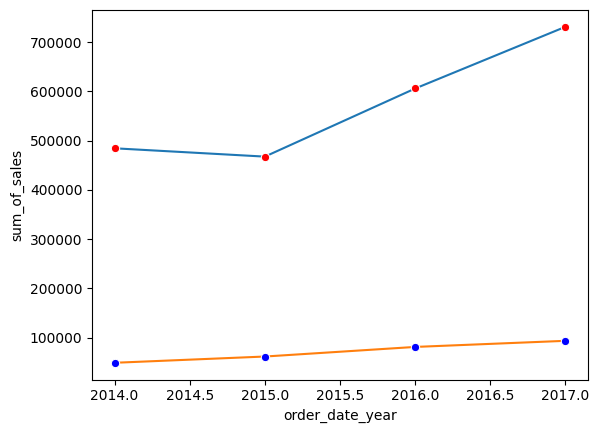

In [111]:
import seaborn as sns

ax = sns.lineplot(data=df_sales_profit_trend_yearly_pandas,x="order_date_year",y="sum_of_sales",marker="o",markerfacecolor="red")
sns.lineplot(data=df_sales_profit_trend_yearly_pandas,x="order_date_year",y="sum_of_profit",marker="o",markerfacecolor="blue")

#ax.set_xticklabels(df_sales_profit_trend_yearly_pandas["order_date_year"])


In [112]:
df_sales_profit_trend_concat.show()

+---------------+----------------+------------------+-------------------+----------+
|order_date_year|order_date_month|      sum_of_sales|      sum_of_profit|order_date|
+---------------+----------------+------------------+-------------------+----------+
|           2014|              01|14440.988981723785|  2417.089096903801|   2014-01|
|           2014|              02|   4287.5999532938|  786.0427871495485|   2014-02|
|           2014|              03|55693.983466386795|  419.4310258924961|   2014-03|
|           2014|              04| 28307.34489107132|  3453.560147807002|   2014-04|
|           2014|              05|23690.594869852066|  2732.580576121807|   2014-05|
|           2014|              06| 34620.85148477554|  5058.239358738065|   2014-06|
|           2014|              07| 33836.44079363346| -925.1018113940954|   2014-07|
|           2014|              08| 27771.29618215561|  5353.998365625739|   2014-08|
|           2014|              09| 81832.37530499697|  8215.78418

C:\Users\amith\AppData\Local\Temp\ipykernel_16364\4038517600.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_sales_profit_trend_concat_pandas["order_date"],rotation=45,fontdict={"size":"10"})


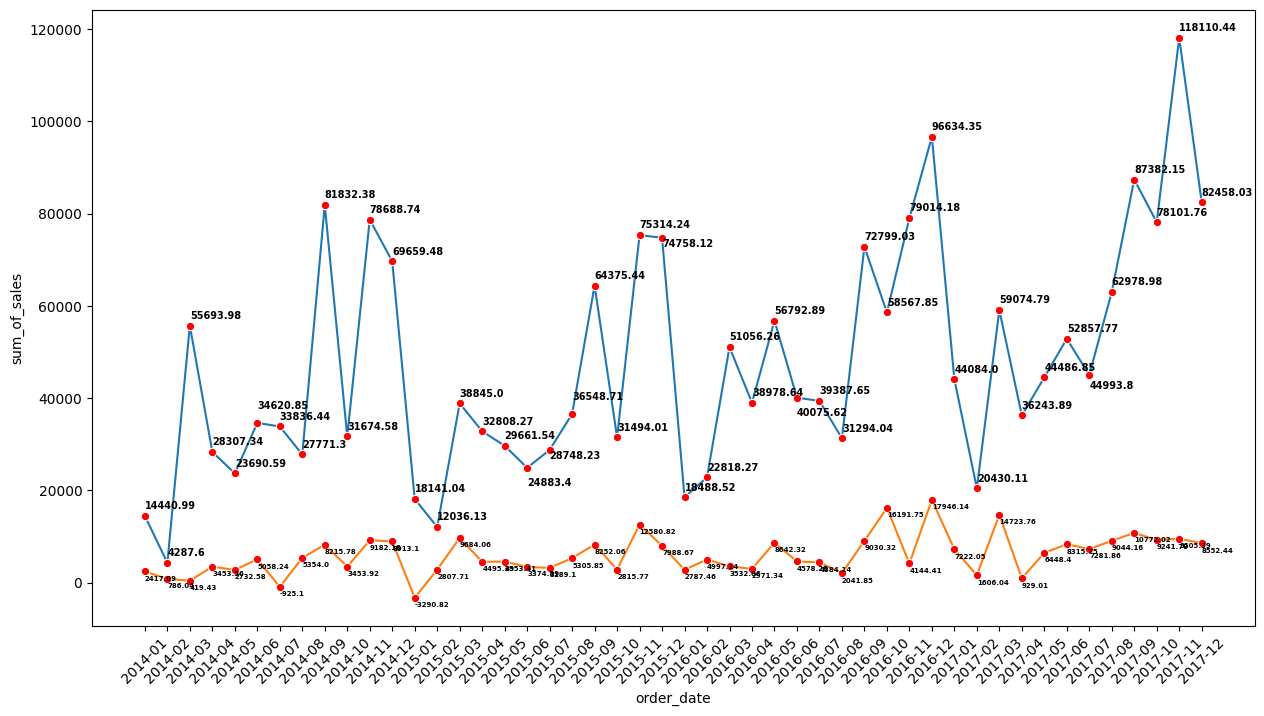

In [113]:
import matplotlib.pyplot as plt

df_sales_profit_trend_concat_pandas = df_sales_profit_trend_concat.toPandas()
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=df_sales_profit_trend_concat_pandas,x="order_date",y="sum_of_sales",marker="o",markerfacecolor="red")
sns.lineplot(data=df_sales_profit_trend_concat_pandas,x="order_date",y="sum_of_profit",marker="o",markerfacecolor="red")

ax.set_xticklabels(df_sales_profit_trend_concat_pandas["order_date"],rotation=45,fontdict={"size":"10"})

for i in range(df_sales_profit_trend_concat_pandas.shape[0]):
    x_label = df_sales_profit_trend_concat_pandas.loc[i,"order_date"]
    y_label = df_sales_profit_trend_concat_pandas.loc[i,"sum_of_sales"]
    y2_label = df_sales_profit_trend_concat_pandas.loc[i,"sum_of_profit"]
    if i == 5:
        adding_factor = 3000
    elif i == 17:
        adding_factor = -4000
    elif i == 18:
        adding_factor = -2000
    elif i == 19:
        adding_factor = 3000
    elif i == 23:
        adding_factor = -2000
    elif i == 29:
        adding_factor = -4000
    elif i == 42:
        adding_factor = -3000
    else:
        adding_factor = 1500
    
    ax.text(x_label,y_label+adding_factor,builtins.round(y_label,2),fontdict={"size":"7","weight":"bold"})
    ax.text(x_label,y2_label-2000,builtins.round(y2_label,2),fontdict={"size":"5","weight":"bold"})

As far as sales are concerned, we observe some occasional spikes, which indicate abrupt increase in sales in certain months, and then the sales might again come back to the normal pattern. Overall, we observe a slightly increasing pattern in sales. For profit, we see a straight line pattern, although we observe some occasional increase and decrease in few months.

**42. Are there seasonal patterns in sales?**


In [114]:
df_sales_profit_trend.printSchema()

root
 |-- order_date_year: integer (nullable = true)
 |-- order_date_month: integer (nullable = true)
 |-- sum_of_sales: double (nullable = true)
 |-- sum_of_profit: double (nullable = true)



In [115]:
df_sales_monthly = df_sales_profit_trend.groupBy("order_date_month").mean("sum_of_sales")
df_sales_monthly = df_sales_monthly.withColumn("order_date_month",col("order_date_month").astype("int"))


df_profit_monthly = df_sales_profit_trend.groupBy("order_date_month").mean("sum_of_profit")
df_profit_monthly = df_profit_monthly.withColumn("order_date_month",col("order_date_month").astype("int"))

df_sales_monthly_pandas = df_sales_monthly.toPandas()
df_profit_monthly_pandas = df_profit_monthly.toPandas()

df_profit_monthly_pandas.head()

,order_date_month,avg(sum_of_profit)
0,12,10850.089489
1,1,2283.945107
2,6,5331.788989
3,3,7089.827271
4,5,5594.177479


<Axes: xlabel='order_date_month', ylabel='avg(sum_of_sales)'>

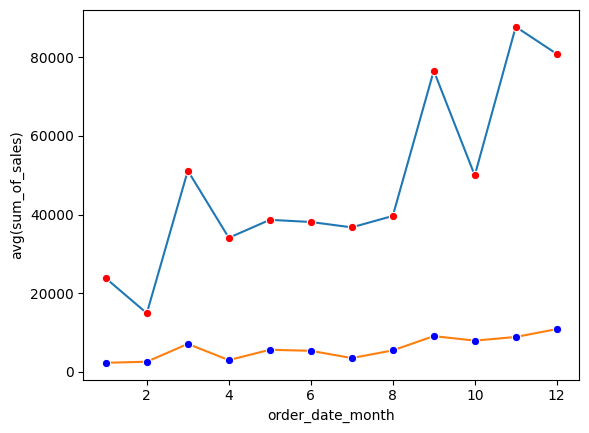

In [116]:
import seaborn as sns

ax = sns.lineplot(data=df_sales_monthly_pandas,x="order_date_month",y="avg(sum_of_sales)",marker="o",markerfacecolor="red")

sns.lineplot(data=df_profit_monthly_pandas,x="order_date_month",y="avg(sum_of_profit)",marker="o",markerfacecolor="blue")

In [117]:
df_2014 = df_sales_profit_trend.filter(col("order_date_year")==2014).toPandas()
df_2015 = df_sales_profit_trend.filter(col("order_date_year")==2015).toPandas()
df_2016 = df_sales_profit_trend.filter(col("order_date_year")==2016).toPandas()
df_2017 = df_sales_profit_trend.filter(col("order_date_year")==2017).toPandas()

In [118]:
df_2017

,order_date_year,order_date_month,sum_of_sales,sum_of_profit
0,2017,1,44083.997535,7222.049013
1,2017,2,20430.106346,1606.037813
2,2017,3,59074.791519,14723.760246
3,2017,4,36243.885110,929.006489
4,2017,5,44486.847952,6448.399254
5,2017,6,52857.769680,8315.750944
6,2017,7,44993.799901,7281.858640
7,2017,8,62978.975750,9044.155313
8,2017,9,87382.153708,10772.019039
9,2017,10,78101.763021,9241.775749


<Axes: xlabel='order_date_month', ylabel='sum_of_sales'>

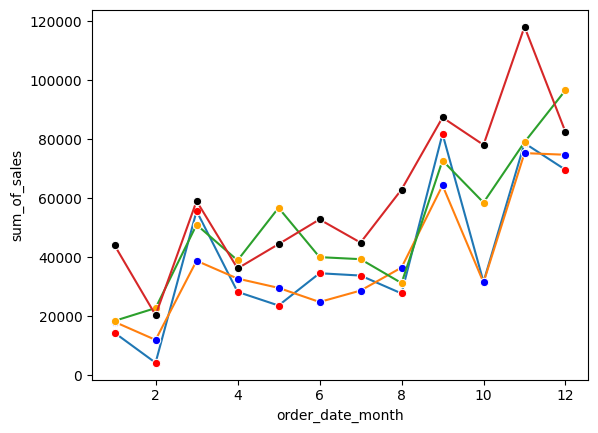

In [123]:
import seaborn as sns

ax = sns.lineplot(data=df_2014,x="order_date_month",y="sum_of_sales",marker="o",markerfacecolor="red")
sns.lineplot(data=df_2015,x="order_date_month",y="sum_of_sales",marker="o",markerfacecolor="blue")
sns.lineplot(data=df_2016,x="order_date_month",y="sum_of_sales",marker="o",markerfacecolor="orange")
sns.lineplot(data=df_2017,x="order_date_month",y="sum_of_sales",marker="o",markerfacecolor="black")



Yes, we observe highest sales in September to December - This is the entire Autumn (fall) to early Winter 

Or we can also say fall season, Thanksgiving and Christmas times.

**43. Which months consistently perform worst/best?**

We observe September, November and December to be the best performing months.

**44. Are shipping delays affecting profit over time?**

In [126]:
df_8.show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+------------------+--------+-------------------+--------+---------------+----------------+---------------+--------------+---------------+--------------+
|row_id|      order_id|order_date| ship_date|     ship_mode|customer_id|     customer_name|    segment|      country|           city|         state|postal_code| region|     product_id|       category|sub_category|        product_name|             sales|quantity|           discount|  profit|order_date_year|order_date_month|order_date_date|ship_date_year|ship_date_month|ship_date_date|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+-------------

In [135]:
df_9 = df_8.withColumn("ship_order_delay",datediff(col("ship_date"),col("order_date")))
df_9.select("order_date","ship_order_delay","profit").show()

+----------+----------------+--------+
|order_date|ship_order_delay|  profit|
+----------+----------------+--------+
|2016-11-08|               3| 41.9136|
|2016-11-08|               3| 219.582|
|2016-06-12|               4|  6.8714|
|2015-10-11|               7|-383.031|
|2015-10-11|               7|  2.5164|
|2014-06-09|               5| 14.1694|
|2014-06-09|               5|  1.9656|
|2014-06-09|               5| 90.7152|
|2014-06-09|               5|  5.7825|
|2014-06-09|               5|   34.47|
|2014-06-09|               5| 85.3092|
|2014-06-09|               5| 68.3568|
|2017-04-15|               5|  5.4432|
|2016-12-05|               5|132.5922|
|2015-11-22|               4|-123.858|
|2015-11-22|               4|  -3.816|
|2014-11-11|               7| 13.3176|
|2014-05-13|               2|    9.99|
|2014-08-27|               5|  2.4824|
|2014-08-27|               5|  16.011|
+----------+----------------+--------+
only showing top 20 rows



No, shipping delays don't affect profit on time. They are independent.